In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sc
import math

plots_dir = 'S:\\lab_winter\\martin\\MED14_PRO-seq_final\\plots\\TT-seq\\' # directory for output plots

In [2]:
####################################
#### load in all the gene lists ####
####################################

### edited 14.8.2019 to update to newest SE gene lists (taken from pause-initiation notebook)
SE_genes = pd.read_excel('S:\\lab_winter\\martin\\Mediator_CRC\\SE_464_genes.xlsx')
TF_genes = pd.read_excel('S:\\lab_winter\\martin\\Mediator_CRC\\TF_53_genes.xlsx')
CRC_genes = pd.read_excel('S:\\lab_winter\\martin\\Mediator_CRC\\autoregulatory_6motifs_24_genes.xlsx')

In [3]:
######################################
#### grep genes from DEseq tables ####
######################################
# DEseq2 dataframe
DEseq_TT_1h_df = pd.read_csv('S:\\lab_winter\\martin\\MJ-19-1\\20190418_JaegerWinter2019TTseqKBM7\\DifferentialExpression\\differential.expression.estimates_1h.txt', sep="\t")
DEseq_TT_2h_df = pd.read_csv('T:\\groups\\lab_winter\\martin\\MJ-19-1_Cramer_lab\\differential.expression.estimates_2nddTAG72h.txt', sep="\t")
DEseq_TT_NVP2_df = pd.read_csv('T:\\groups\\lab_winter\\martin\\MJ-19-1_Cramer_lab\\differential.expression.estimates_2ndNVP230.txt', sep="\t")
DEseq_TT_combo_df = pd.read_csv('T:\\groups\\lab_winter\\martin\\MJ-19-1_Cramer_lab\\differential.expression.estimates_2nddTAG72hNVP230.txt', sep="\t")

##### grep CRC genes #####
# use query to parse geneIDs from the DEseq result table. Need to use the '|'.join construct to use geneIDs as REGEX, where some TRxxx annotations have more than on gene_id
CRC_1h_DEseq = DEseq_TT_1h_df[DEseq_TT_1h_df.gene_id.str.contains('|'.join(CRC_genes.geneID.tolist()), na=False)]
CRC_2h_DEseq = DEseq_TT_2h_df[DEseq_TT_2h_df.gene_id.str.contains('|'.join(CRC_genes.geneID.tolist()), na=False)]
CRC_NVP2_DEseq = DEseq_TT_NVP2_df[DEseq_TT_NVP2_df.gene_id.str.contains('|'.join(CRC_genes.geneID.tolist()), na=False)]
CRC_combo_DEseq = DEseq_TT_combo_df[DEseq_TT_combo_df.gene_id.str.contains('|'.join(CRC_genes.geneID.tolist()), na=False)]

##### same for 51 TF SE-genes #####
TF_1h_DEseq = DEseq_TT_1h_df[DEseq_TT_1h_df.gene_id.str.contains('|'.join(TF_genes.geneID.tolist()), na=False)]
TF_2h_DEseq = DEseq_TT_2h_df[DEseq_TT_2h_df.gene_id.str.contains('|'.join(TF_genes.geneID.tolist()), na=False)]
TF_NVP2_DEseq = DEseq_TT_NVP2_df[DEseq_TT_NVP2_df.gene_id.str.contains('|'.join(TF_genes.geneID.tolist()), na=False)]
TF_combo_DEseq = DEseq_TT_combo_df[DEseq_TT_combo_df.gene_id.str.contains('|'.join(TF_genes.geneID.tolist()), na=False)]

##### same for 423 SE genes; unfortunately we lose one gene (not contained in the TT-seq annotation) #####
SE_1h_DEseq = DEseq_TT_1h_df[DEseq_TT_1h_df.gene_id.str.contains('|'.join(SE_genes.geneID.tolist()), na=False)]
SE_2h_DEseq = DEseq_TT_2h_df[DEseq_TT_2h_df.gene_id.str.contains('|'.join(SE_genes.geneID.tolist()), na=False)]
SE_NVP2_DEseq = DEseq_TT_NVP2_df[DEseq_TT_NVP2_df.gene_id.str.contains('|'.join(SE_genes.geneID.tolist()), na=False)]
SE_combo_DEseq = DEseq_TT_combo_df[DEseq_TT_combo_df.gene_id.str.contains('|'.join(SE_genes.geneID.tolist()), na=False)]

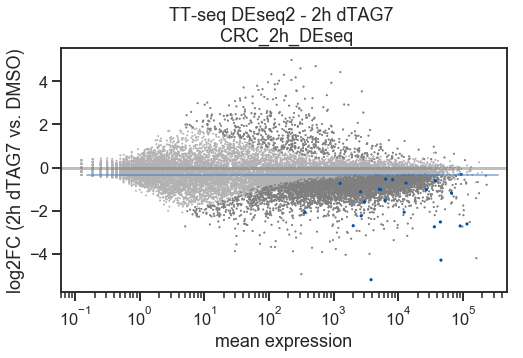

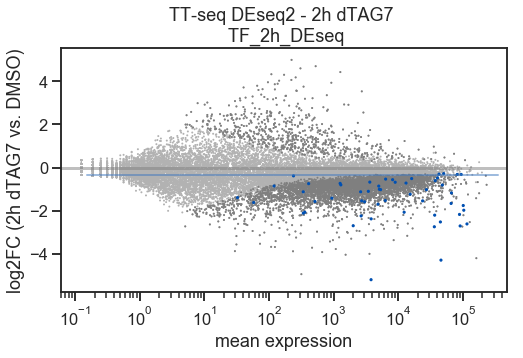

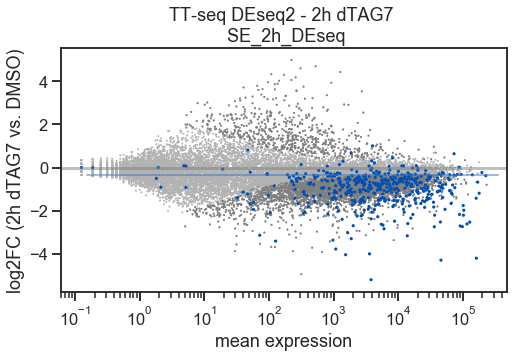

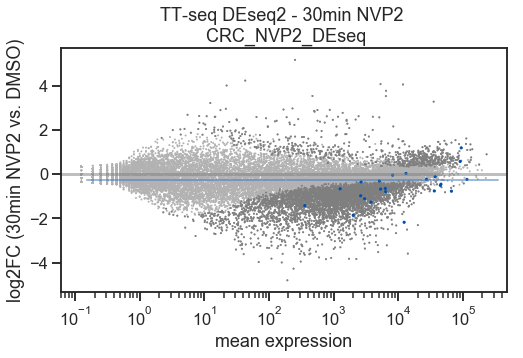

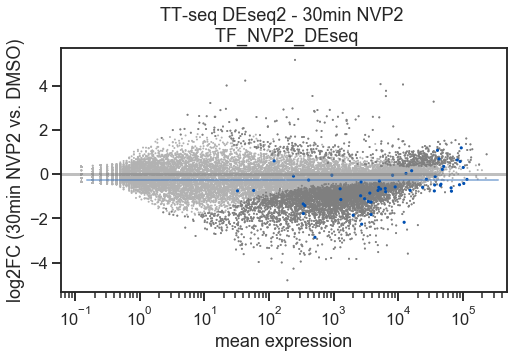

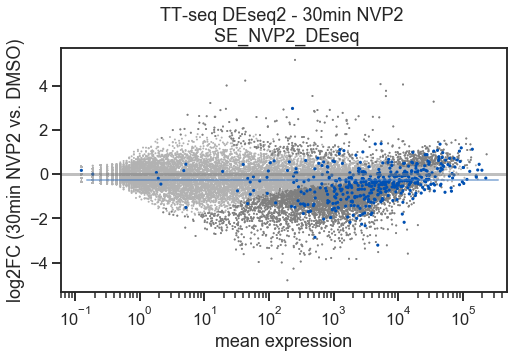

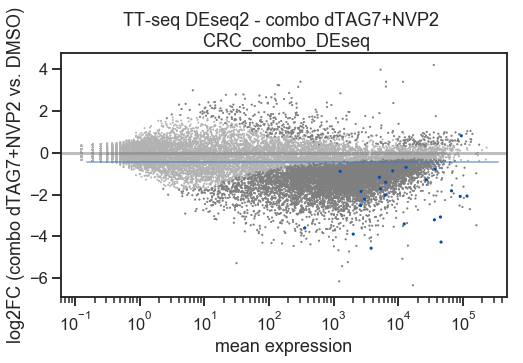

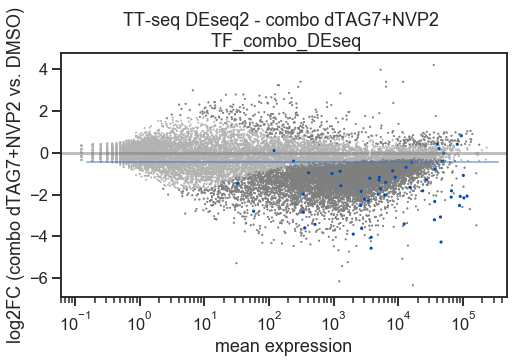

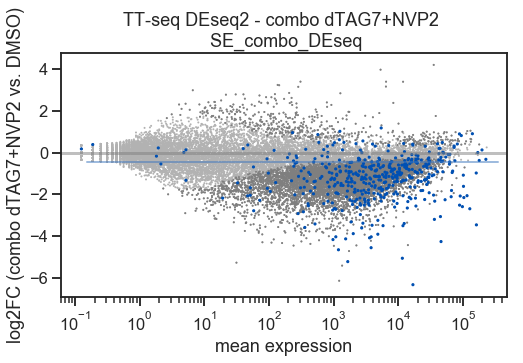

In [4]:
####################################
#### plot all sets individually ####
####################################

# first 2h dTAG
all_sets = [CRC_2h_DEseq, TF_2h_DEseq, SE_2h_DEseq]
all_set_names = ["CRC_2h_DEseq", "TF_2h_DEseq", "SE_2h_DEseq"]

counter = 0
for geneset in all_sets:
    # make the plots
    plt.close('all')
    sns.set_style('ticks')
    sns.set_context('talk')
    plt.figure(figsize=(8,4.5))

    # for plotting kernel density colormap
    #xy = np.vstack([DEseq_TT_1h_df.baseMean,DEseq_TT_1h_df.log2FoldChange])
    #z = sc.stats.gaussian_kde(xy)(xy)

    # plotting all individual
    plt.axhline(color="grey",alpha=0.5, linewidth=3)
    plt.axhline(xmin=0.06, xmax=0.98, y=DEseq_TT_2h_df.log2FoldChange.median(), color="#3f78bf",alpha=0.5, linewidth=2)
    plt.scatter(x=DEseq_TT_2h_df.baseMean, y=DEseq_TT_2h_df.log2FoldChange, s=4, c="#b2b2b2", edgecolors="none")
    plt.scatter(x=DEseq_TT_2h_df.baseMean[DEseq_TT_2h_df.padj < 0.01], y=DEseq_TT_2h_df.log2FoldChange[DEseq_TT_2h_df.padj < 0.01], s=4, c="#7f7f7f", edgecolors="none")
    plt.scatter(x=geneset.baseMean, y=geneset.log2FoldChange, s=10, c="#0050b3", edgecolors="none")

    # formatting
    plt.xscale('log')
    plt.title('TT-seq DEseq2 - 2h dTAG7 \n {0}'.format(all_set_names[counter]))
    plt.xlabel('mean expression')
    plt.ylabel('log2FC (2h dTAG7 vs. DMSO)')

    # save
    #plt.savefig(plots_dir + 'TT-seq_combined_DE_scatter\\{0}_scatterplot.pdf'.format(all_set_names[counter]), dpi=300)
    #plt.savefig(plots_dir + 'TT-seq_combined_DE_scatter\\{0}_scatterplot.png'.format(all_set_names[counter]), dpi=300)
    counter += 1
    plt.show()
    
    
    
# 30min NVP2
all_sets = [CRC_NVP2_DEseq, TF_NVP2_DEseq, SE_NVP2_DEseq]
all_set_names = ["CRC_NVP2_DEseq", "TF_NVP2_DEseq", "SE_NVP2_DEseq"]

counter = 0
for geneset in all_sets:
    # make the plots
    plt.close('all')
    sns.set_style('ticks')
    sns.set_context('talk')
    plt.figure(figsize=(8,4.5))

    # for plotting kernel density colormap
    #xy = np.vstack([DEseq_TT_1h_df.baseMean,DEseq_TT_1h_df.log2FoldChange])
    #z = sc.stats.gaussian_kde(xy)(xy)

    # plotting all individual
    plt.axhline(color="grey",alpha=0.5, linewidth=3)
    plt.axhline(xmin=0.06, xmax=0.98, y=DEseq_TT_NVP2_df.log2FoldChange.median(), color="#3f78bf",alpha=0.5, linewidth=2)
    plt.scatter(x=DEseq_TT_NVP2_df.baseMean, y=DEseq_TT_NVP2_df.log2FoldChange, s=4, c="#b2b2b2", edgecolors="none")
    plt.scatter(x=DEseq_TT_NVP2_df.baseMean[DEseq_TT_NVP2_df.padj < 0.01], y=DEseq_TT_NVP2_df.log2FoldChange[DEseq_TT_NVP2_df.padj < 0.01], s=4, c="#7f7f7f", edgecolors="none")
    plt.scatter(x=geneset.baseMean, y=geneset.log2FoldChange, s=10, c="#0050b3", edgecolors="none")

    # formatting
    plt.xscale('log')
    plt.title('TT-seq DEseq2 - 30min NVP2 \n {0}'.format(all_set_names[counter]))
    plt.xlabel('mean expression')
    plt.ylabel('log2FC (30min NVP2 vs. DMSO)')

    # save
    #plt.savefig(plots_dir + 'TT-seq_combined_DE_scatter\\{0}_scatterplot.pdf'.format(all_set_names[counter]), dpi=300)
    #plt.savefig(plots_dir + 'TT-seq_combined_DE_scatter\\{0}_scatterplot.png'.format(all_set_names[counter]), dpi=300)
    counter += 1
    plt.show()
    
    
    
# combo 2h dTAG + 30min NVP2
all_sets = [CRC_combo_DEseq, TF_combo_DEseq, SE_combo_DEseq]
all_set_names = ["CRC_combo_DEseq", "TF_combo_DEseq", "SE_combo_DEseq"]

counter = 0
for geneset in all_sets:
    # make the plots
    plt.close('all')
    sns.set_style('ticks')
    sns.set_context('talk')
    plt.figure(figsize=(8,4.5))

    # for plotting kernel density colormap
    #xy = np.vstack([DEseq_TT_1h_df.baseMean,DEseq_TT_1h_df.log2FoldChange])
    #z = sc.stats.gaussian_kde(xy)(xy)

    # plotting all individual
    plt.axhline(color="grey",alpha=0.5, linewidth=3)
    plt.axhline(xmin=0.06, xmax=0.98, y=DEseq_TT_combo_df.log2FoldChange.median(), color="#3f78bf",alpha=0.5, linewidth=2)
    plt.scatter(x=DEseq_TT_combo_df.baseMean, y=DEseq_TT_combo_df.log2FoldChange, s=4, c="#b2b2b2", edgecolors="none")
    plt.scatter(x=DEseq_TT_combo_df.baseMean[DEseq_TT_combo_df.padj < 0.01], y=DEseq_TT_combo_df.log2FoldChange[DEseq_TT_combo_df.padj < 0.01], s=4, c="#7f7f7f", edgecolors="none")
    plt.scatter(x=geneset.baseMean, y=geneset.log2FoldChange, s=10, c="#0050b3", edgecolors="none")

    # formatting
    plt.xscale('log')
    plt.title('TT-seq DEseq2 - combo dTAG7+NVP2 \n {0}'.format(all_set_names[counter]))
    plt.xlabel('mean expression')
    plt.ylabel('log2FC (combo dTAG7+NVP2 vs. DMSO)')

    # save
    #plt.savefig(plots_dir + 'TT-seq_combined_DE_scatter\\{0}_scatterplot.pdf'.format(all_set_names[counter]), dpi=300)
    #plt.savefig(plots_dir + 'TT-seq_combined_DE_scatter\\{0}_scatterplot.png'.format(all_set_names[counter]), dpi=300)
    counter += 1
    plt.show()
    

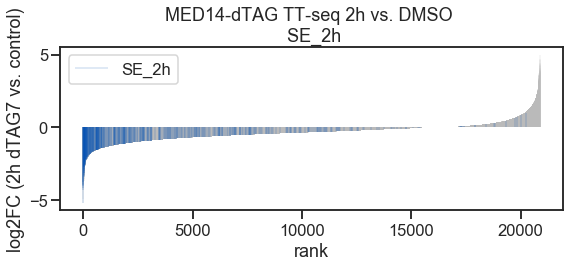

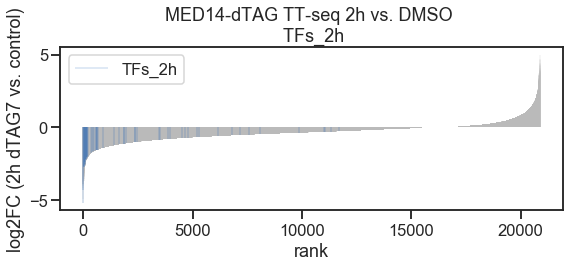

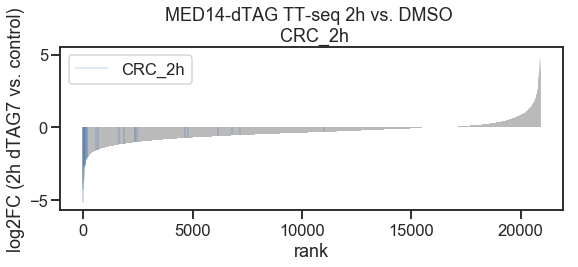

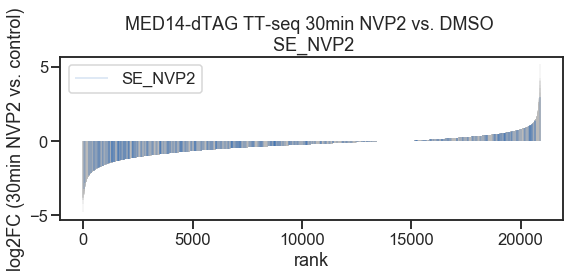

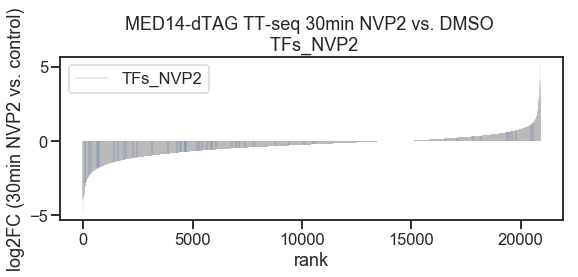

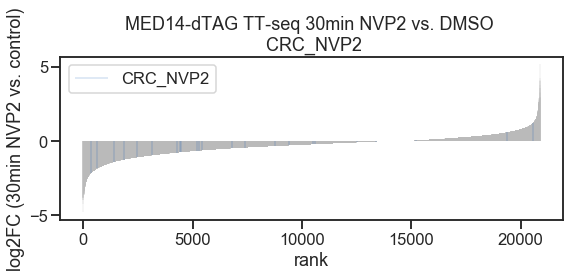

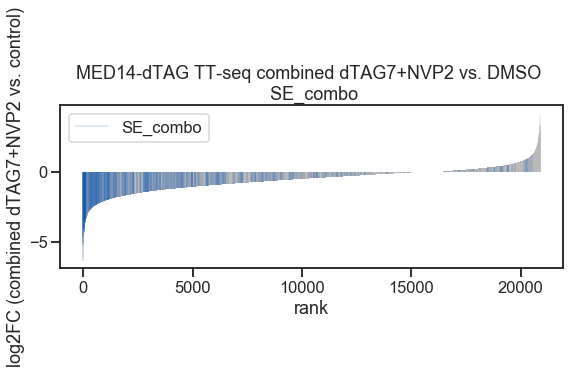

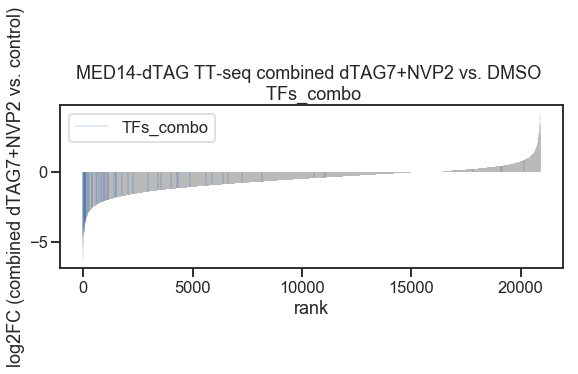

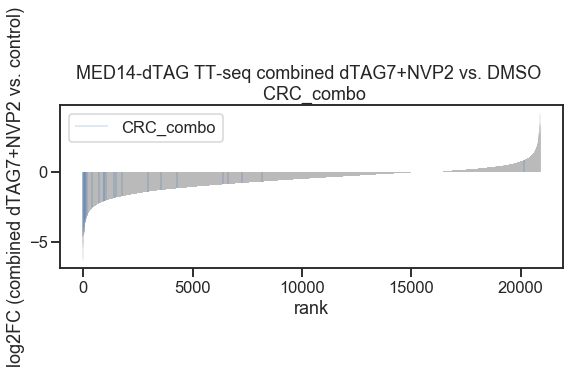

In [5]:
########################
#### make waterfall ####
########################

# first 2h dTAG7
ascending_2h = DEseq_TT_2h_df.sort_values(by='log2FoldChange')
# add rank column
ascending_2h['rank'] = np.arange(len(ascending_2h.index))

# proxies for grepping the gene sets
SE_2h_asc = ascending_2h.gene_id.str.contains('|'.join(SE_genes.geneID.tolist()), na=False)
TFs_2h_asc = (ascending_2h.gene_id.str.contains('|'.join(TF_genes.geneID.tolist()), na=False)) & (ascending_2h.index != 'TR23076')
CRC_2h_asc = (ascending_2h.gene_id.str.contains('|'.join(CRC_genes.geneID.tolist()), na=False)) & (ascending_2h.index != 'TR23076')

all_sets = [SE_2h_asc, TFs_2h_asc, CRC_2h_asc]
all_set_names = ["SE_2h", "TFs_2h", "CRC_2h"]

##### make the plots individually
counter = 0
for geneset in all_sets:
    plt.close('all')
    sns.set_style('ticks')
    sns.set_context('talk')
    plt.figure(figsize=(9,3))

    plt.vlines(x=ascending_2h['rank'], ymin=0, ymax=ascending_2h['log2FoldChange'], linewidth=.25, color='#bababa')
    plt.vlines(x=ascending_2h[geneset]['rank'], ymin=0, ymax=ascending_2h[geneset]['log2FoldChange'], linewidth=.25, color='#0050b3', label='{0}'.format(all_set_names[counter]))
    #plt.vlines(x=ascending[TF_ascending]['rank'], ymin=0, ymax=ascending[TF_ascending]['log2FoldChange'], linewidth=.25, color='#6c00cc', label='TF_genes')
    #plt.vlines(x=ascending[CRC_ascending]['rank'], ymin=0, ymax=ascending[CRC_ascending]['log2FoldChange'], linewidth=.25, color='black', label='CRC_genes')

    plt.xlabel('rank')
    plt.ylabel('log2FC (2h dTAG7 vs. control)')
    plt.title('MED14-dTAG TT-seq 2h vs. DMSO \n {0}'.format(all_set_names[counter]))
    plt.legend(loc=2)


    #plt.savefig(plots_dir + 'TT-seq_combined_DE_waterfall\\{0}_waterfall.pdf'.format(all_set_names[counter]), dpi=300)
    #plt.savefig(plots_dir + 'TT-seq_combined_DE_waterfall\\{0}_waterfall.png'.format(all_set_names[counter]), dpi=300)
    plt.show()
    counter += 1
    
    
# 30min NVP2
ascending_NVP2 = DEseq_TT_NVP2_df.sort_values(by='log2FoldChange')
# add rank column
ascending_NVP2['rank'] = np.arange(len(ascending_NVP2.index))

# proxies for grepping the gene sets
SE_NVP2_asc = ascending_NVP2.gene_id.str.contains('|'.join(SE_genes.geneID.tolist()), na=False)
TFs_NVP2_asc = (ascending_NVP2.gene_id.str.contains('|'.join(TF_genes.geneID.tolist()), na=False)) & (ascending_NVP2.index != 'TR23076')
CRC_NVP2_asc = (ascending_NVP2.gene_id.str.contains('|'.join(CRC_genes.geneID.tolist()), na=False)) & (ascending_NVP2.index != 'TR23076')

all_sets = [SE_NVP2_asc, TFs_NVP2_asc, CRC_NVP2_asc]
all_set_names = ["SE_NVP2", "TFs_NVP2", "CRC_NVP2"]

##### make the plots individually
counter = 0
for geneset in all_sets:
    plt.close('all')
    sns.set_style('ticks')
    sns.set_context('talk')
    plt.figure(figsize=(9,3))

    plt.vlines(x=ascending_NVP2['rank'], ymin=0, ymax=ascending_NVP2['log2FoldChange'], linewidth=.25, color='#bababa')
    plt.vlines(x=ascending_NVP2[geneset]['rank'], ymin=0, ymax=ascending_NVP2[geneset]['log2FoldChange'], linewidth=.25, color='#0050b3', label='{0}'.format(all_set_names[counter]))
    #plt.vlines(x=ascending[TF_ascending]['rank'], ymin=0, ymax=ascending[TF_ascending]['log2FoldChange'], linewidth=.25, color='#6c00cc', label='TF_genes')
    #plt.vlines(x=ascending[CRC_ascending]['rank'], ymin=0, ymax=ascending[CRC_ascending]['log2FoldChange'], linewidth=.25, color='black', label='CRC_genes')

    plt.xlabel('rank')
    plt.ylabel('log2FC (30min NVP2 vs. control)')
    plt.title('MED14-dTAG TT-seq 30min NVP2 vs. DMSO \n {0}'.format(all_set_names[counter]))
    plt.legend(loc=2)


    #plt.savefig(plots_dir + 'TT-seq_combined_DE_waterfall\\{0}_waterfall.pdf'.format(all_set_names[counter]), dpi=300)
    #plt.savefig(plots_dir + 'TT-seq_combined_DE_waterfall\\{0}_waterfall.png'.format(all_set_names[counter]), dpi=300)
    plt.show()
    counter += 1

    
# combined dTAG+NVP2
ascending_combo = DEseq_TT_combo_df.sort_values(by='log2FoldChange')
# add rank column
ascending_combo['rank'] = np.arange(len(ascending_combo.index))

# proxies for grepping the gene sets
SE_combo_asc = ascending_combo.gene_id.str.contains('|'.join(SE_genes.geneID.tolist()), na=False)
TFs_combo_asc = (ascending_combo.gene_id.str.contains('|'.join(TF_genes.geneID.tolist()), na=False)) & (ascending_combo.index != 'TR23076')
CRC_combo_asc = (ascending_combo.gene_id.str.contains('|'.join(CRC_genes.geneID.tolist()), na=False)) & (ascending_combo.index != 'TR23076')

all_sets = [SE_combo_asc, TFs_combo_asc, CRC_combo_asc]
all_set_names = ["SE_combo", "TFs_combo", "CRC_combo"]

##### make the plots individually
counter = 0
for geneset in all_sets:
    plt.close('all')
    sns.set_style('ticks')
    sns.set_context('talk')
    plt.figure(figsize=(9,3))

    plt.vlines(x=ascending_combo['rank'], ymin=0, ymax=ascending_combo['log2FoldChange'], linewidth=.25, color='#bababa')
    plt.vlines(x=ascending_combo[geneset]['rank'], ymin=0, ymax=ascending_combo[geneset]['log2FoldChange'], linewidth=.25, color='#0050b3', label='{0}'.format(all_set_names[counter]))
    #plt.vlines(x=ascending[TF_ascending]['rank'], ymin=0, ymax=ascending[TF_ascending]['log2FoldChange'], linewidth=.25, color='#6c00cc', label='TF_genes')
    #plt.vlines(x=ascending[CRC_ascending]['rank'], ymin=0, ymax=ascending[CRC_ascending]['log2FoldChange'], linewidth=.25, color='black', label='CRC_genes')

    plt.xlabel('rank')
    plt.ylabel('log2FC (combined dTAG7+NVP2 vs. control)')
    plt.title('MED14-dTAG TT-seq combined dTAG7+NVP2 vs. DMSO \n {0}'.format(all_set_names[counter]))
    plt.legend(loc=2)


    #plt.savefig(plots_dir + 'TT-seq_combined_DE_waterfall\\{0}_waterfall.pdf'.format(all_set_names[counter]), dpi=300)
    #plt.savefig(plots_dir + 'TT-seq_combined_DE_waterfall\\{0}_waterfall.png'.format(all_set_names[counter]), dpi=300)
    plt.show()
    counter += 1


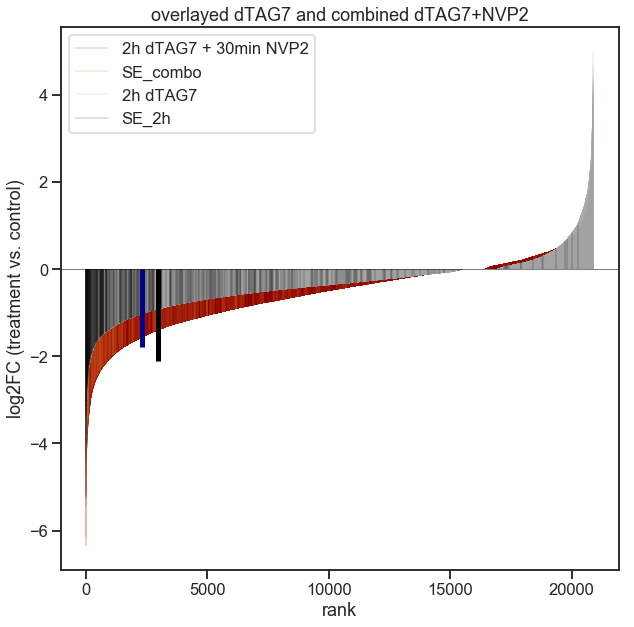

skew_2h 	0.669652534459 	 skewtest_2h 	SkewtestResult(statistic=36.061885356117735, pvalue=8.981513822633331e-285) 		 kurtosis_2h 		5.56382301123
skew_combo 	-0.44297781036 	 skewtest_combo 	SkewtestResult(statistic=-25.006189629177488, pvalue=5.235568067051153e-138) 		 kurtosis_combo 	1.77526966648


In [6]:
##### overlayed waterfall
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize=(10,10))

plt.axhline(y=0, linewidth=.5, color="black")
plt.vlines(x=ascending_combo['rank'], ymin=0, ymax=ascending_combo['log2FoldChange'], alpha=1, linewidth=.25, color='darkred', label='2h dTAG7 + 30min NVP2')
plt.vlines(x=ascending_combo[SE_combo_asc]['rank'], ymin=0, ymax=ascending_combo[SE_combo_asc]['log2FoldChange'], linewidth=.25, color='#db671f', label='SE_combo')
plt.vlines(x=ascending_2h['rank'], ymin=0, ymax=ascending_2h['log2FoldChange'], alpha=1, linewidth=.25, color='darkgrey', label='2h dTAG7')
plt.vlines(x=ascending_2h[SE_2h_asc]['rank'], ymin=0, ymax=ascending_2h[SE_2h_asc]['log2FoldChange'], linewidth=.25, color='black', label='SE_2h')

plt.vlines(x=ascending_2h[CRC_2h_asc]['rank'].mean(), ymin=0, ymax=ascending_2h[CRC_2h_asc]['log2FoldChange'].mean(), alpha=1, linewidth=5, color='darkblue')
plt.vlines(x=ascending_combo[CRC_combo_asc]['rank'].mean(), ymin=0, ymax=ascending_combo[CRC_combo_asc]['log2FoldChange'].mean(), alpha=1, linewidth=5, color='black')

plt.xlabel('rank')
plt.ylabel('log2FC (treatment vs. control)')
plt.title('overlayed dTAG7 and combined dTAG7+NVP2')
plt.legend(loc=2)

#plt.savefig(plots_dir + 'TT-seq_combined_DE_waterfall\\Fig3H_overlayed_2hdTAG_vs_combo_waterfall_SEmeans.pdf', dpi=300)
#plt.savefig(plots_dir + 'TT-seq_combined_DE_waterfall\\Fig3H_overlayed_2hdTAG_vs_combo_waterfall_SEmeans.png', dpi=300)
plt.show()


print "skew_2h \t", sc.stats.skew(DEseq_TT_2h_df.log2FoldChange), "\t skewtest_2h \t", sc.stats.skewtest(DEseq_TT_2h_df.log2FoldChange), "\t\t kurtosis_2h \t\t", sc.stats.kurtosis(DEseq_TT_2h_df.log2FoldChange)
print "skew_combo \t", sc.stats.skew(DEseq_TT_combo_df.log2FoldChange), "\t skewtest_combo \t", sc.stats.skewtest(DEseq_TT_combo_df.log2FoldChange), "\t\t kurtosis_combo \t", sc.stats.kurtosis(DEseq_TT_combo_df.log2FoldChange)

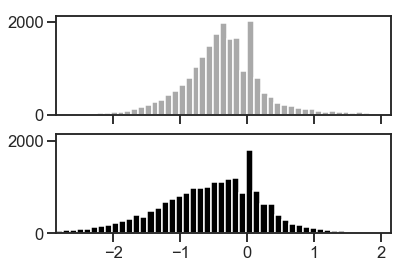

In [101]:
##### combined and 2h histograms => to see skewedness
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
fig,ax = plt.subplots(2,1,sharex=True, sharey=True)

ax[0].hist(DEseq_TT_2h_df.log2FoldChange, bins=100, color="darkgray")
ax[1].hist(DEseq_TT_combo_df.log2FoldChange, bins=100, color="black")
plt.xlim(DEseq_TT_2h_df.log2FoldChange.median() - 2.5 ,DEseq_TT_2h_df.log2FoldChange.median() + 2.5)

#plt.savefig(plots_dir + 'TT-seq_1h_DE_waterfall\\{0}_1h_waterfall_all.pdf'.format(all_set_names[counter]), dpi=300)
#plt.savefig(plots_dir + 'TT-seq_1h_DE_waterfall\\{0}_1h_waterfall_all.png'.format(all_set_names[counter]), dpi=300)
plt.show()

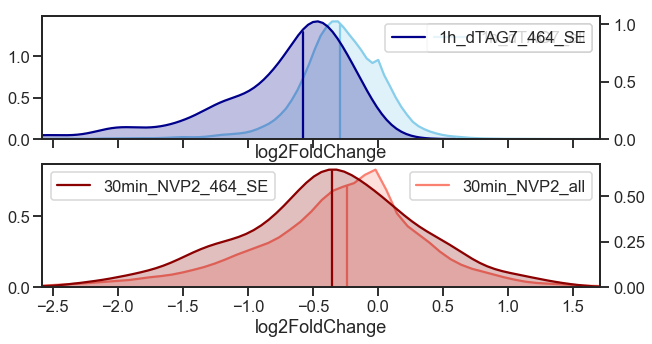

skew_1h 	-1.2566089934 	 skewtest_1h 	SkewtestResult(statistic=-56.72926775834072, pvalue=0.0) 		 kurtosis_1h 		6.97266694007
skew_NVP2 	-0.432848300105 	 skewtest_NVP2 	SkewtestResult(statistic=-24.479315364852933, pvalue=2.453486766558176e-132) 		 kurtosis_NVP2 	2.71771267032


In [198]:
##### distplots 30min NVP2 vs. 1h dTAG7
plt.close('all')
sns.set_style('ticks')
sns.set_context('talk')
fig,ax = plt.subplots(2,1,sharex=True, sharey=False, figsize=(10,5))

### oldskool histograms
#ax[0].hist(DEseq_TT_2h_df.log2FoldChange, bins=100, color="skyblue", alpha=.5)
#ax2=ax[0].twinx()
#ax2.hist(SE_2h_DEseq.log2FoldChange, bins=100, color="darkblue", alpha=.5)
#ax[1].hist(DEseq_TT_NVP2_df.log2FoldChange, bins=100, color="red", alpha=.5)
#ax3=ax[1].twinx()
#ax3.hist(SE_NVP2_DEseq.log2FoldChange, bins=100, color="darkred", alpha=.5)

### seaborn distplots
sns.distplot(DEseq_TT_1h_df.log2FoldChange, hist=False, kde=True, bins=100, color="skyblue", ax=ax[0], kde_kws={"shade": True}, label="1h_dTAG7_all")
ax2=ax[0].twinx()
sns.distplot(SE_1h_DEseq.log2FoldChange, hist=False, kde=True, bins=100, color="darkblue", ax=ax2, kde_kws={"shade": True}, label="1h_dTAG7_464_SE")
sns.distplot(DEseq_TT_NVP2_df.log2FoldChange, hist=False, kde=True, bins=100, color="salmon", ax=ax[1], kde_kws={"shade": True}, label="30min_NVP2_all")
ax3=ax[1].twinx()
sns.distplot(SE_NVP2_DEseq.log2FoldChange, hist=False, kde=True, bins=100, color="darkred", ax=ax3, kde_kws={"shade": True}, label="30min_NVP2_464_SE")

ax[0].axvline(ymax=0.92, x=DEseq_TT_1h_df.log2FoldChange.median(), color="skyblue")
ax[0].axvline(ymax=0.87, x=SE_1h_DEseq.log2FoldChange.median(), color="darkblue")
ax[1].axvline(ymax=0.82, x=DEseq_TT_NVP2_df.log2FoldChange.median(), color="salmon")
ax[1].axvline(ymax=0.94, x=SE_NVP2_DEseq.log2FoldChange.median(), color="darkred")


plt.xlim(SE_1h_DEseq.log2FoldChange.median() - 2 ,DEseq_TT_1h_df.log2FoldChange.median() + 2)

#plt.savefig(plots_dir + 'TT-seq_combined_DE_waterfall\\1h_dTAG7_vs_30min_NVP2_TT-seq_DESeq_distplot.pdf', dpi=300)
#plt.savefig(plots_dir + 'TT-seq_combined_DE_waterfall\\1h_dTAG7_vs_30min_NVP2_TT-seq_DESeq_distplot.png', dpi=300)
plt.show()

print "skew_1h \t", sc.stats.skew(DEseq_TT_1h_df.log2FoldChange), "\t skewtest_1h \t", sc.stats.skewtest(DEseq_TT_1h_df.log2FoldChange), "\t\t kurtosis_1h \t\t", sc.stats.kurtosis(DEseq_TT_1h_df.log2FoldChange)
print "skew_NVP2 \t", sc.stats.skew(DEseq_TT_NVP2_df.log2FoldChange), "\t skewtest_NVP2 \t", sc.stats.skewtest(DEseq_TT_NVP2_df.log2FoldChange), "\t\t kurtosis_NVP2 \t", sc.stats.kurtosis(DEseq_TT_NVP2_df.log2FoldChange)

In [9]:
ascending_2h

,chr,strand,start,end,type,source,length,id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id,transcript_id,rank
TR10279,chr8,+,127736069,127741434,transcribed_region,REFSEQ_merge,5366,TR10279,3804.6250,-5.196812,0.274149,-18.956190,3.925698e-80,6.833332e-77,ENSG00000136997,NM_002467,0
TR13136,chr11,+,60280541,60308972,transcribed_region,REFSEQ_merge,28432,TR13136,317.3750,-4.939840,0.282520,-17.484910,1.867068e-68,2.089249e-65,ENSG00000110079,NM_148975 NM_001243266 NM_024021,1
TR07987,chr6,+,135181315,135219173,transcribed_region,REFSEQ_merge,37859,TR07987,45948.8750,-4.289163,0.179481,-23.897572,3.246049e-126,5.085261e-122,ENSG00000118513 NA,NM_001161657 NM_001130173 NM_001161658 NM_0011...,2
TR10700,chr8,-,107249482,107498055,transcribed_region,REFSEQ_merge,248574,TR10700,162086.4375,-4.199418,0.310161,-13.539473,9.144245e-42,3.493994e-39,ENSG00000154188 NA,NM_001199859 NM_001146 NM_001314051,3
TR10357,chr8,-,6499651,6563263,transcribed_region,REFSEQ_merge,63613,TR10357,1536.8750,-4.039139,0.178142,-22.673674,8.150104e-114,6.383976e-110,ENSG00000091879,NM_001118888 NM_001118887 NM_001147,4
TR03389,chr2,-,43222402,43226606,transcribed_region,REFSEQ_merge,4205,TR03389,3598.0625,-3.998013,0.319302,-12.521111,5.722828e-36,1.469735e-33,ENSG00000152518,NM_006887,5
TR12400,chr10,-,15513949,15720335,transcribed_region,REFSEQ_merge,206387,TR12400,666.3125,-3.916788,0.239847,-16.330390,5.999949e-60,4.947116e-57,ENSG00000077943,NM_003638 NM_001291494,6
TR13134,chr11,+,60056628,60071115,transcribed_region,REFSEQ_merge,14488,TR13134,235.7500,-3.879328,0.274715,-14.121304,2.807471e-45,1.157417e-42,ENSG00000149516,NM_001031809 NM_006138 NM_001031666,7
TR19032,chr17,+,34580749,34639318,transcribed_region,REFSEQ_merge,58570,TR19032,29.7500,-3.872672,0.532333,-7.274906,3.466624e-13,1.060706e-11,ENSG00000181291,NM_001304438,8
TR09621,chr7,-,81699008,81770198,transcribed_region,REFSEQ_merge,71191,TR09621,1082.1875,-3.774688,0.283967,-13.292695,2.552188e-40,8.691865e-38,ENSG00000019991,NM_000601 NM_001010932 NM_001010934 NM_0010109...,9


In [23]:
sc.stats.skewtest?

In [22]:
sc.stats.mannwhitneyu

'1.2.1'